<a href="https://colab.research.google.com/github/RedLeader962/T13-Deep-Learning-Project/blob/T13PRO-159-experimentation-branch/colab_experiment_runner_T1Charlie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab `team13twin-rudder` experiment runner - RUN T1 CP/MC

### Jupyter notebook stuff

In [1]:
# Load and turn ON IPython autoreload
#   %autoreload 0 - disables the auto-reloading. This is the default setting
#   %autoreload 1 - it will only auto-reload modules that were imported using the %aimport function (e.g %aimport my_module).
#   %autoreload 2 - auto-reload all the modules
#
#   Alternative:
#   ```
#   import importlib
#   importlib.reload(my_module)
#   ```
# source: https://switowski.com/blog/ipython-autoreload
# %load_ext autoreload
# %autoreload 2
#
# %matplotlib inline

### Clone `T13-Deep-Learning-Project` repository

#### Setup local user

In [3]:
import os
from getpass import getpass

if not os.path.exists('./codebase'):
    user = getpass('GitHub user')
    password = getpass('GitHub password')
    os.environ['GITHUB_AUTH'] = user + ':' + password
    # !git clone -l -s https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git cloned-repo
    !git clone -l -s --branch T13PRO-159-experimentation-branch https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git cloned-repo

    %cd cloned-repo
    !ls
else:
    print("››› T13-Deep-Learning-Project.git is already cloned")

GitHub password··········
Cloning into 'cloned-repo'...
remote: Enumerating objects: 2997, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 2997 (delta 91), reused 170 (delta 50), pack-reused 2777
Receiving objects: 100% (2997/2997), 126.77 MiB | 27.68 MiB/s, done.
Resolving deltas: 100% (2078/2078), done.
Checking out files: 100% (622/622), done.
/content/cloned-repo
Backup_trajectories_Do_Not_Delete_or_Change  images	       script
codebase				     __init__.py       tests
experiment				     README.md
experiment_runner			     requirements.txt


#### Pull repo update when needed

In [4]:
!git pull https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git

From https://github.com/RedLeader962/T13-Deep-Learning-Project
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


#### Test `T13-Deep-Learning-Project` cloning procedure

In [5]:
from experiment_runner.experiment_runner_utils import check_repository_pulled_to_local_drive_ok
check_repository_pulled_to_local_drive_ok()

hellooooowwwwwww RedLeader962!


------------------------------------------------------------------------------------------------------------------------

In [6]:
## Check l'état du GPU en loop à tout les 10sec
# !watch -n10.0 nvidia-smi

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Mon May  3 14:03:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

------------------------------------------------------------------------------------------------------------------------
# `lstm` model baseline experimentation

In [7]:
import dataclasses

import torch
import numpy as np
import random

from codebase import rudder as rd
from experiment_runner.experiment_spec import (
    ExperimentSpec,
    PpoExperimentSpec,
    RudderLstmExperimentSpec,
    PpoRudderExperimentSpec
    )

from experiment_runner.parameter_search_map import (
    PpoRudderParameterSearchMap,
    RudderLstmParameterSearchMap
    )

from experiment_runner.colab_spec_configuration import (
    colab_rudder_lstm_specs,
    colab_ppo_rudder_top_to_bottom_specs,
    T1Bravo_CP_colab_ppo_rudder_top_to_bottom_specs,
    T1Bravo_MC_colab_ppo_rudder_top_to_bottom_specs,
    T1Charlie_MC_colab_ppo_w_rudder_specs,
    )
from experiment_runner.experiment_runner_utils import execute_experiment_plan, execute_parameter_search
# from script.Script_run_LSTM import main as script_rudder_lstm_main,
from script.Script_run_ppo_with_rudder import main as script_rudder_run_ppo_with_rudder_main
from script.Script_run_ppo_with_rudder_top_to_bottom import main as script_rudder_run_ppo_with_rudder_TOP_TO_BOTTOM_main


In [8]:
"""
Check all available field in `experiment_runner/experiment_spec.py`
"""

# colab_specs = RudderLstmParameterSearchMap(
#     env_name="CartPole-v1",
#     env_batch_size=lambda: random.choice([4, 6, 8, 10]),
#     model_hidden_size=lambda: random.choice([10, 15, 20, 25, 30, 40, 60]),
#     env_n_trajectories=lambda: random.choice([3000, 4000, 5000, ]),
#     env_perct_optimal=lambda: random.choice([0.3, 0.4, 0.5, 0.5, 0.5, 0.6, 0.7, ]),
#     env_rew_factor=lambda: random.choice([1.0, 1.0, 0.1, 0.01, ]),
#     n_epoches=lambda: random.choice([20, 40, 60, 80, 100, 140, 200, 300, 400, 600]),
#     optimizer_weight_decay=lambda: random.choice([1e-1, 1e-2, 1e-3]),
#     optimizer_lr=lambda: random.choice([1e-1, 1e-2, 1e-3]),
#     show_plot=True,
#     print_to_consol=False,
#     seed=42,
#     )


'\nCheck all available field in `experiment_runner/experiment_spec.py`\n'

In [9]:
# exp_spec = colab_specs



---
---
# Exp T1Charlie_MC | MontainCar

#### T1Charlie_MC | Run 1



:::: (1/10) Start experiment 1 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-1
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-1
                     spec_idx : 1
               steps_by_epoch : 600
                    n_e

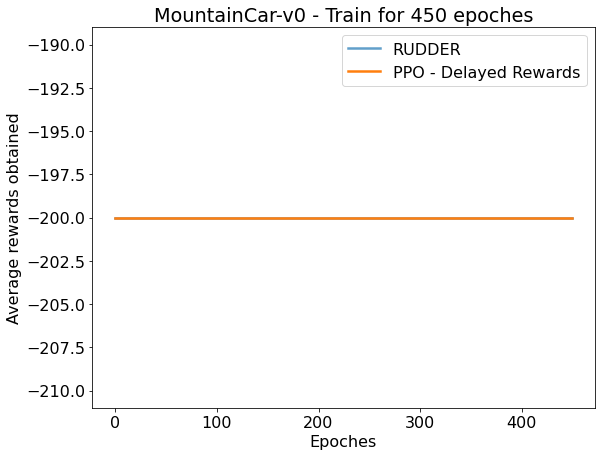



:::: (2/10) Start experiment 2 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-2
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-2
                     spec_idx : 2
               steps_by_epoch : 600
                    n_e

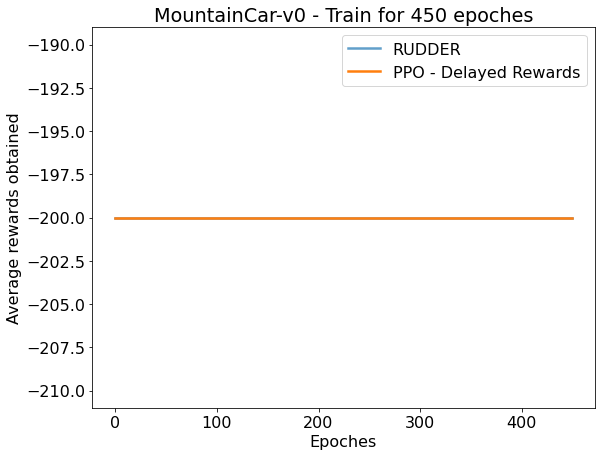



:::: (3/10) Start experiment 3 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-3
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-3
                     spec_idx : 3
               steps_by_epoch : 600
                    n_e

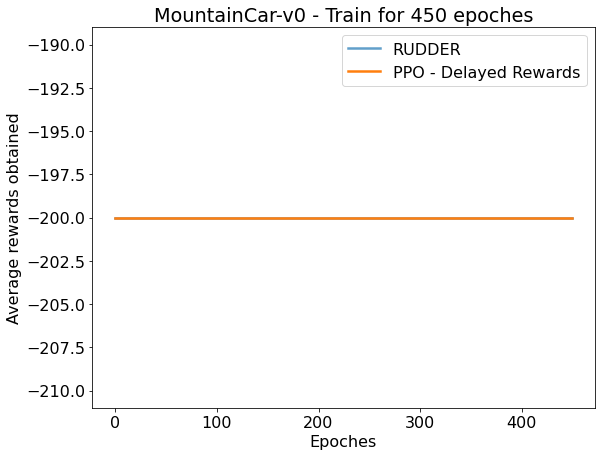



:::: (4/10) Start experiment 4 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-4
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-4
                     spec_idx : 4
               steps_by_epoch : 600
                    n_e

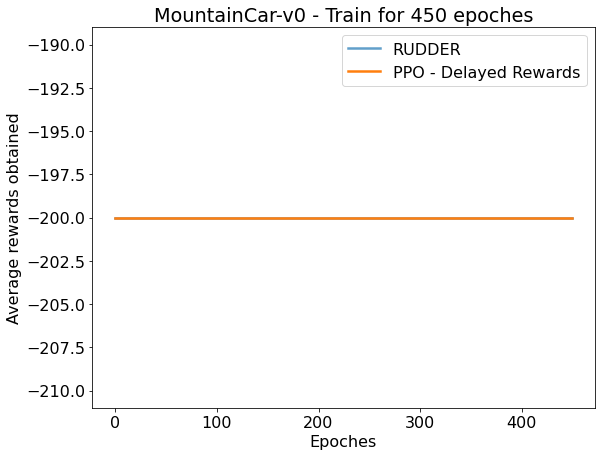



:::: (5/10) Start experiment 5 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-5
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-5
                     spec_idx : 5
               steps_by_epoch : 600
                    n_e

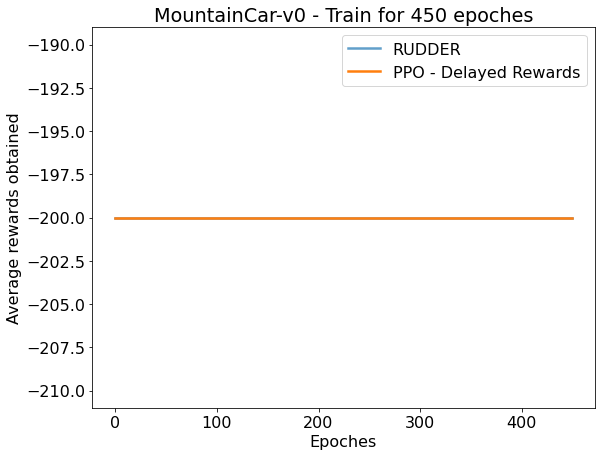



:::: (6/10) Start experiment 6 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-6
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-6
                     spec_idx : 6
               steps_by_epoch : 600
                    n_e

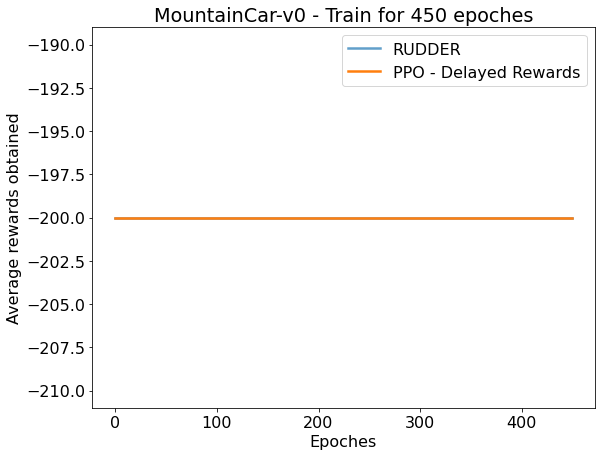



:::: (7/10) Start experiment 7 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-7
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-7
                     spec_idx : 7
               steps_by_epoch : 600
                    n_e

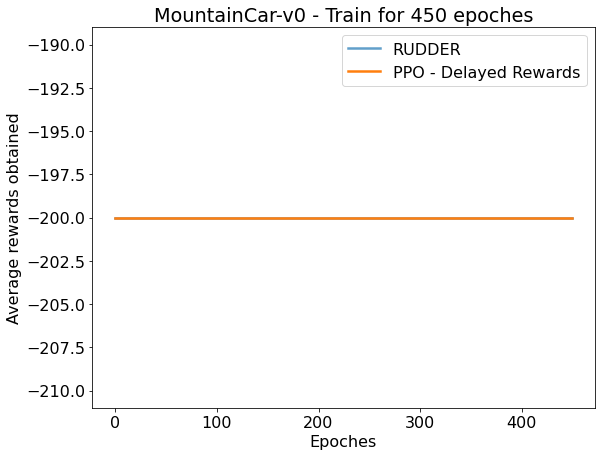



:::: (8/10) Start experiment 8 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-8
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-8
                     spec_idx : 8
               steps_by_epoch : 600
                    n_e

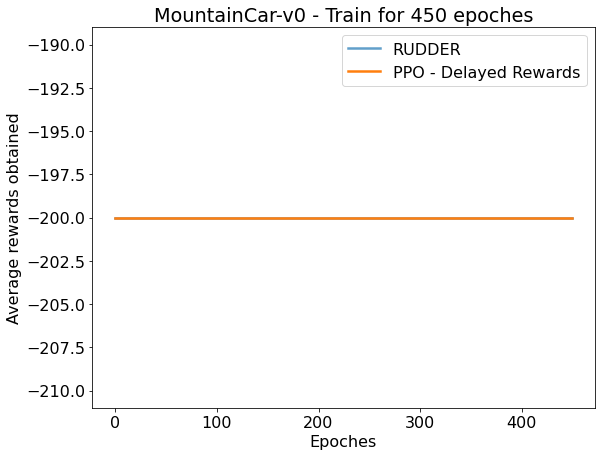



:::: (9/10) Start experiment 9 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-9
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-9
                     spec_idx : 9
               steps_by_epoch : 600
                    n_e

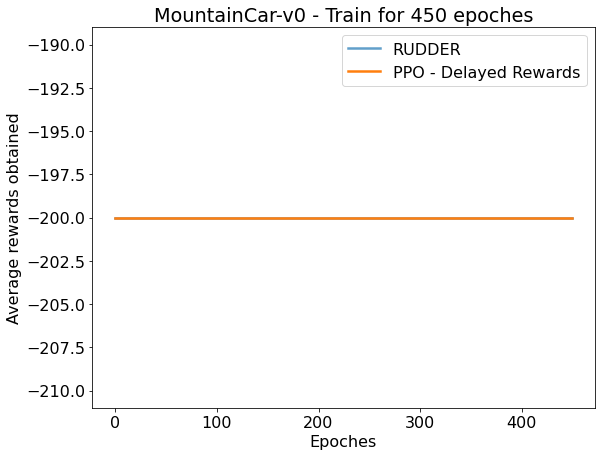



:::: (10/10) Start experiment 10 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

   PpoRudderParameterSearchMap ›››
                    spec_name : ppo_with_rudder using arbitrary model
                     env_name : MountainCar-v0
                    show_plot : True
              print_to_consol : False
                      comment : Config for Script_run_ppo_with_rudder.py  using model lstm_30_0.01_2000_0.5_pas_si_pire.pt
Result: 
                         seed : 53
               experiment_dir : run-10
                is_batch_spec : True
                    batch_tag : T1MC-Charlie
                    batch_dir : batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954
          root_experiment_dir : experiment/run
              experiment_path : experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-10
                     spec_idx : 10
               steps_by_epoch : 600
                    

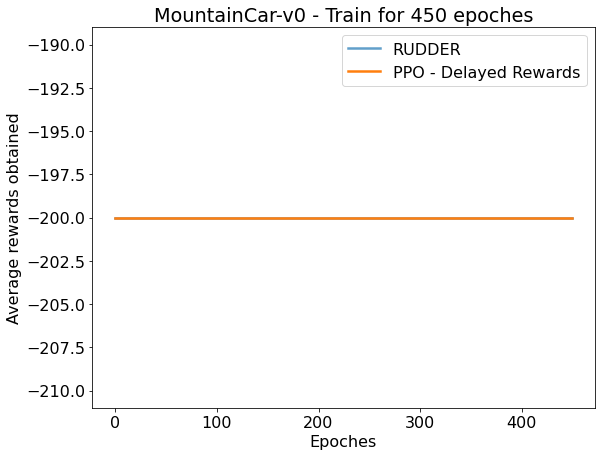


 :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 10 experimentation DONE ::::
 ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 




In [10]:

result = execute_parameter_search(T1Charlie_MC_colab_ppo_w_rudder_specs,
                                  script_fct=script_rudder_run_ppo_with_rudder_main,
                                  exp_size=10, start_count_at=1)

In [11]:
!git add experiment/run/CartPole-v1/\*/\*
!git add experiment/run/CartPole-v1/\*/lstm_\*.pt
!git add experiment/run/CartPole-v1/\*/\*.jpg
!git add experiment/run/MountainCar-v0/\*
!git add experiment/run/MountainCar-v0/\*/lstm_\*.pt
!git add experiment/run/MountainCar-v0/\*/\*.jpg

!git commit -am "Colab run RedLeader962 T1Chralie run"
!git push https://$GITHUB_AUTH@github.com/RedLeader962/T13-Deep-Learning-Project.git --all



fatal: pathspec 'experiment/run/CartPole-v1/*/*' did not match any files
fatal: pathspec 'experiment/run/CartPole-v1/*/lstm_*.pt' did not match any files
fatal: pathspec 'experiment/run/CartPole-v1/*/*.jpg' did not match any files
[T13PRO-159-experimentation-branch 9a072b3] Colab run RedLeader962 T1Chralie run
 10 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-1/MountainCar-v0_PPO_RUDDER.jpg
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-10/MountainCar-v0_PPO_RUDDER.jpg
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-2/MountainCar-v0_PPO_RUDDER.jpg
 create mode 100644 experiment/run/MountainCar-v0/batch-T1MC-Charlie-14h3--3-5-2021--104841789115970792529109722238964989954/run-3/MountainCar-v0_PPO_RUD